### LOAN APPROVAL PREDICTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('loan_approval_dataset.csv')
df.shape

(4269, 13)

In [3]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [4]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [7]:
num_col = [col for col in df.columns if df[col].dtype != 'object']
cat_col = [col for col in df.columns if df[col].dtype == 'object']

print('Numerical columns:\n', num_col)
print('\nCategorical columns:\n', cat_col)

Numerical columns:
 ['loan_id', ' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value']

Categorical columns:
 [' education', ' self_employed', ' loan_status']


In [8]:
df[cat_col].head()

,education,self_employed,loan_status
0,Graduate,No,Approved
1,Not Graduate,Yes,Rejected
2,Graduate,No,Rejected
3,Graduate,No,Rejected
4,Not Graduate,Yes,Rejected


In [9]:
for col in cat_col:
    print(f'\nUnique values in {col}: {df[col].unique()}')


Unique values in  education: [' Graduate' ' Not Graduate']

Unique values in  self_employed: [' No' ' Yes']

Unique values in  loan_status: [' Approved' ' Rejected']


In [10]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

for col in cat_col:
    df[col] = lb.fit_transform(df[col])

In [11]:
df[cat_col].head()

,education,self_employed,loan_status
0,0,0,0
1,1,1,1
2,0,0,1
3,0,0,1
4,1,1,1


Value counts:  education
0    2144
1    2125
Name: count, dtype: int64


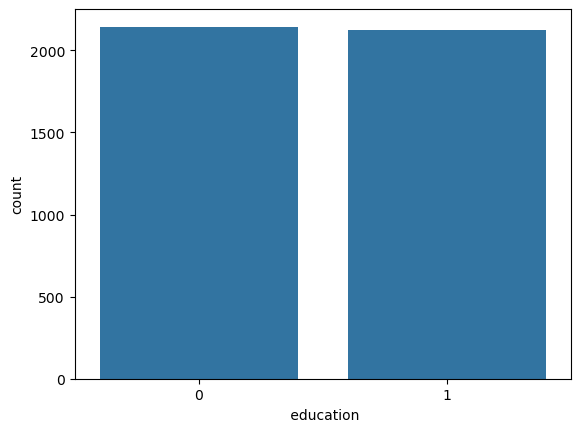

Value counts:  self_employed
1    2150
0    2119
Name: count, dtype: int64


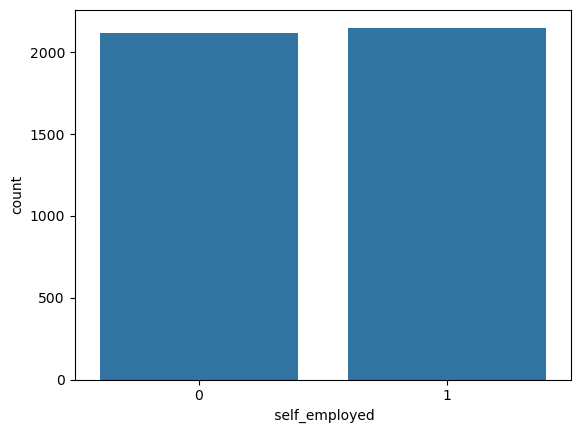

Value counts:  loan_status
0    2656
1    1613
Name: count, dtype: int64


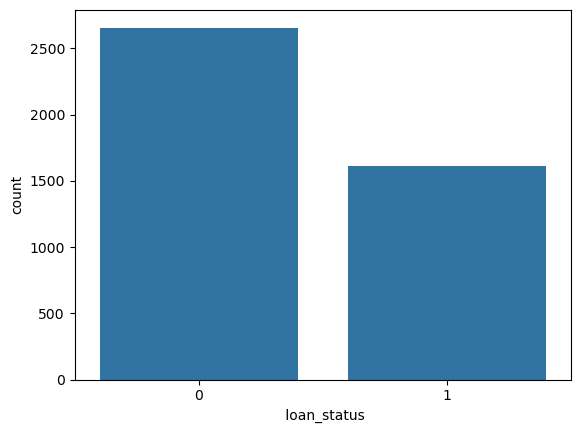

In [12]:
import seaborn as sns

for col in cat_col:
    count = df[col].value_counts()
    print('Value counts:', count)
    sns.countplot( x=df[col])
    plt.show()


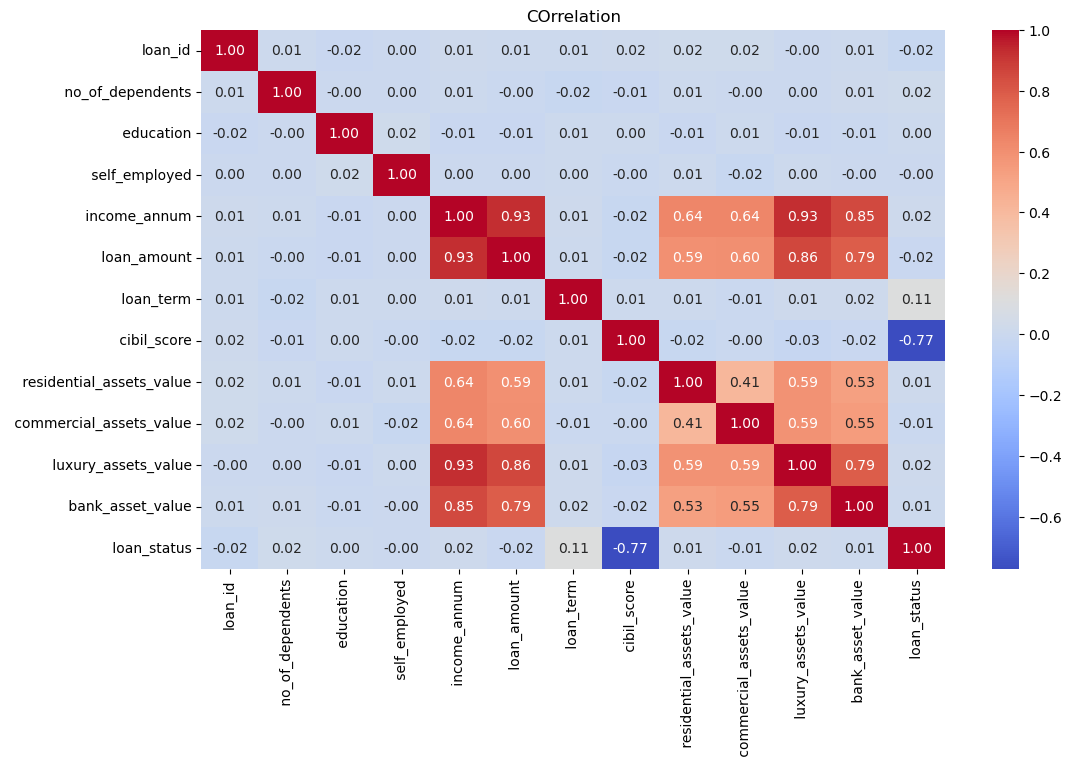

In [13]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,fmt='.2f', cmap='coolwarm')
plt.title('COrrelation')
plt.show()

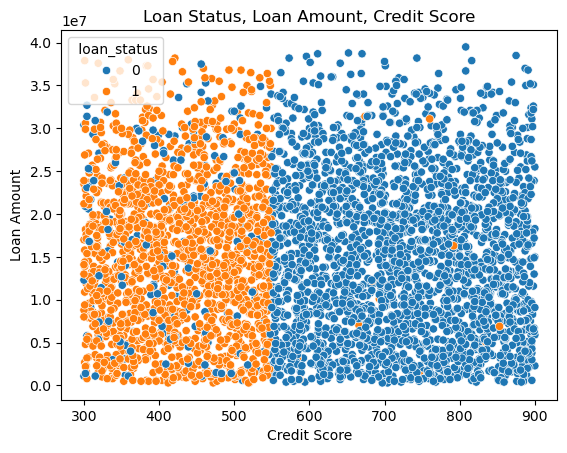

In [14]:
sns.scatterplot(x=df[' cibil_score'], y= df[' loan_amount'], hue=df[' loan_status'])
plt.title("Loan Status, Loan Amount, Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Loan Amount")
plt.show()

In [15]:
df.loc[(df[' cibil_score'] > 740) & (df[' loan_status'] == 1)].sort_values([' cibil_score'], ascending= False).head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
559,560,2,0,1,200000,500000,6,885,-100000,0,300000,200000,1
3527,3528,0,0,0,1800000,6900000,10,853,900000,400000,3700000,1700000,1
911,912,0,0,1,1300000,4800000,4,835,500000,100000,3300000,800000,1
3213,3214,1,1,1,4300000,16300000,14,792,400000,400000,10200000,4000000,1
236,237,3,0,1,900000,3500000,4,770,700000,0,2000000,600000,1


#### * lets go through residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value*

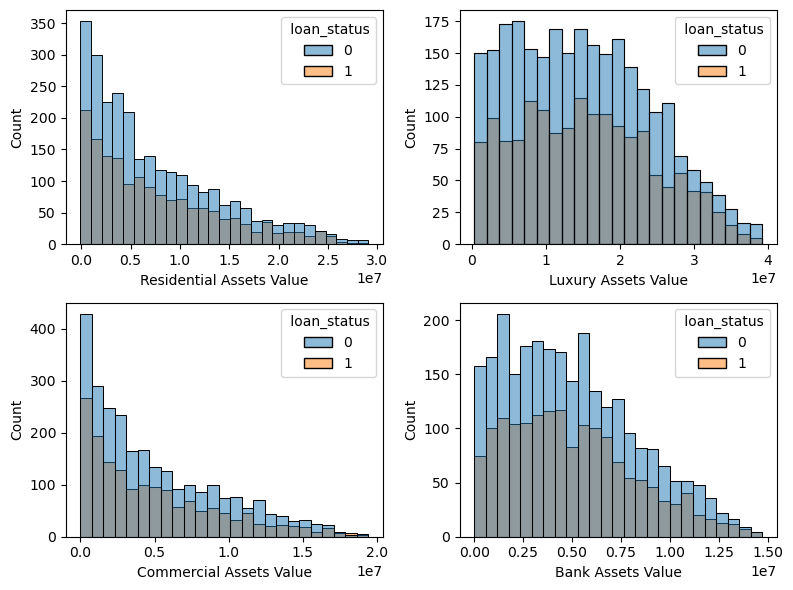

In [16]:
fig,axes = plt.subplots(2, 2, figsize = (8, 6))

sns.histplot(df, x = ' residential_assets_value', hue = ' loan_status', ax = axes[0,0])
axes[0,0].set_xlabel("Residential Assets Value")
axes[0,0].set_ylabel("Count")

sns.histplot(df, x = ' commercial_assets_value', hue = ' loan_status', ax = axes[1,0])
axes[1,0].set_xlabel("Commercial Assets Value")
axes[1,0].set_ylabel("Count")

sns.histplot(df, x = ' luxury_assets_value', hue = ' loan_status', ax = axes[0,1])
axes[0,1].set_xlabel("Luxury Assets Value")
axes[0,1].set_ylabel("Count")

sns.histplot(df, x = ' bank_asset_value', hue = ' loan_status', ax = axes[1,1])
axes[1,1].set_xlabel("Bank Assets Value")
axes[1,1].set_ylabel("Count")

plt.tight_layout()
plt.show()

#### Education

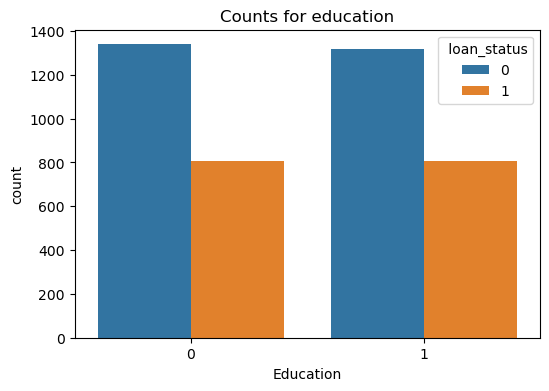

In [17]:
plt.figure(figsize = (6,4))
sns.countplot(df, x=' education', hue=' loan_status')
plt.xlabel("Education")
plt.title("Counts for education")

plt.show()

#### The counts based on different education status are approximately the same.

#### Self Employed

In [18]:
self_employed = df.groupby([" self_employed"], as_index=False).agg(
    count=(" education", "count"),
    median_annual_income=(" income_annum", "median"),
    average_loan_amount=(" loan_amount", "mean"), 
    average_credit_score = (" cibil_score", "mean"),
    average_loan_term = (" loan_term", "mean"),
    avg_residential_value = (' residential_assets_value', "mean"),
    avg_commerical_value = ( ' commercial_assets_value', "mean"),
    avg_luxury_value = ( ' luxury_assets_value', "mean"),
    avg_bank_value = (' bank_asset_value', "mean")
    
).round(2).reset_index(drop=True)

self_employed

,self_employed,count,median_annual_income,average_loan_amount,average_credit_score,average_loan_term,avg_residential_value,avg_commerical_value,avg_luxury_value,avg_bank_value
0,0,2119,5100000.0,15120245.40,600.78,10.88,7432373.76,5052713.54,15085842.38,4977395.0
1,1,2150,5100000.0,15146465.12,599.10,10.92,7512279.07,4894744.19,15166186.05,4976000.0


#### Same thing as the self_employed - there are no significant differences between the self_employed and other variables in this dataset.

#### Number of dependents

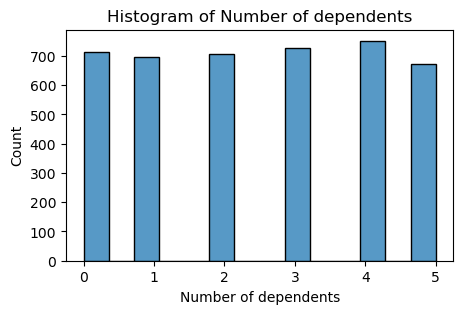

In [19]:
plt.figure(figsize = (5,3))
sns.histplot(df[' no_of_dependents'])
plt.xlabel("Number of dependents")
plt.title("Histogram of Number of dependents")

plt.show()

In [20]:
cross_dependents = pd.crosstab(index=df[' no_of_dependents'], columns=df[' loan_status'])
cross_dependents['Approved_percentage'] = (cross_dependents[0]/(cross_dependents[0] + cross_dependents[1])) * 100
cross_dependents['Rejected_percentage'] = (cross_dependents[1]/(cross_dependents[0] + cross_dependents[1])) * 100
cross_dependents

loan_status,0,1,Approved_percentage,Rejected_percentage
no_of_dependents,,,,
0,457,255,64.185393,35.814607
1,430,267,61.692970,38.307030
2,441,267,62.288136,37.711864
3,457,270,62.861073,37.138927
4,465,287,61.835106,38.164894
5,406,267,60.326895,39.673105


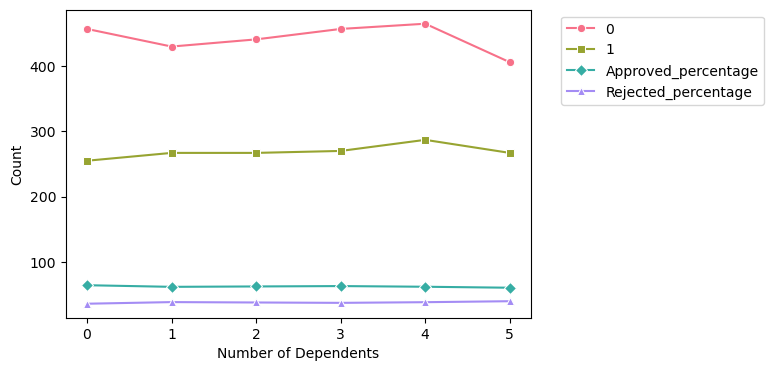

In [21]:
palette = sns.color_palette("husl", n_colors=len(cross_dependents.columns))


plt.figure(figsize = (6,4))
markers = ["o", "s", "D", "^"]  # Adjust based on your data
sns.lineplot(data=cross_dependents, dashes=False, markers=markers, palette=palette)
plt.ylabel("Count")
plt.xlabel("Number of Dependents")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

#### By checking the line chart above which presents the percentage of the applicants being approved or rejected by the number of dependents, we see 2 percentage lines are very evenly, even though we can see a wave over the "approved" line, it might be because of the total number of the applicants. So I have to reject my guess and conclude that we are not able to see an obvious trend between no_of_dependents and loan_status.

In [22]:
print(df.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


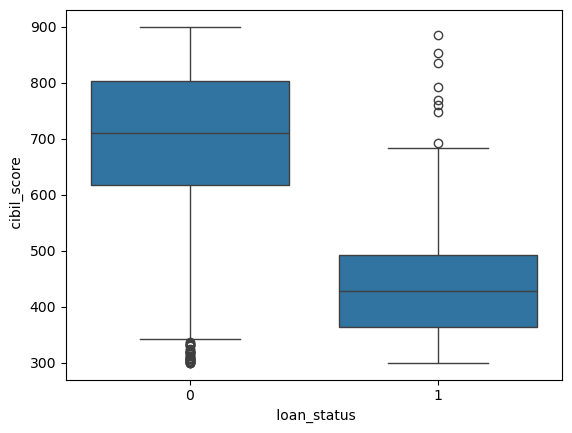

In [23]:
sns.boxplot(x=df[' loan_status'], y=df[' cibil_score'])
plt.show()

In [24]:
X = df.drop(columns=[' loan_status','loan_id'])
y = df[' loan_status']

print(X.columns)
print(y.name)

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value'],
      dtype='object')
 loan_status


In [25]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x_scaled = scale.fit_transform(X)

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, accuracy_score, classification_report, roc_auc_score

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

param_grid = {
        'n_estimators': [100,200, 300],
        'max_depth': [10, 15, 20, None]
}

search_grid = GridSearchCV(RandomForestClassifier(),param_grid, scoring='roc_auc', verbose=2, n_jobs=-1)

search_grid.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20, None],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=2)

In [28]:
print('Best parameters:', search_grid.best_params_)
print('Best auc_score:', search_grid.best_score_)

Best parameters: {'max_depth': 15, 'n_estimators': 300}
Best auc_score: 0.9979511182341371


In [29]:
model = search_grid.best_estimator_

model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print('Best accuracy score:', accuracy_score(y_test, y_pred))
print('Classification report:', classification_report(y_test, y_pred))

Best accuracy score: 0.9789227166276346
Classification report:               precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.98      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

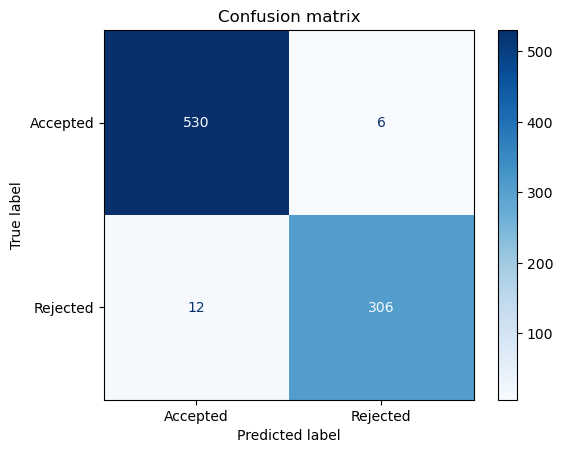

In [31]:
cm = confusion_matrix(y_test, y_pred)

dis = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Accepted', 'Rejected'])
dis.plot(cmap='Blues')
plt.title('Confusion matrix')
plt.show()

### "If you find any errors or have suggestions to improve this prediction, feel free to DM me. Thank you!"

In [32]:
test_input = [[10, 1, 1, 100000, 100000000, 50, 200, 0, 0, 0, 0]]  # Extreme bad case
prediction = model.predict(test_input)
print("Prediction:", prediction)

Prediction: [0]


#### It seems like our model is overfitting; let's train a model splitting the DF in a cross-validation set.

In [33]:
X_temp, x_test_, Y_temp, y_test_ = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_, x_val, Y_train_, y_val = train_test_split(X_temp, Y_temp, test_size=0.25, random_state=42)


In [34]:
scale.fit(X_train_)
X_train_scale = scale.transform(X_train_)
x_val_scale = scale.transform(x_val)
x_test_scale = scale.transform(x_test_)

In [35]:
param_grid_ = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
}

search_grid_ = GridSearchCV(RandomForestClassifier(),param_grid_, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1)

search_grid_.fit(X_train_,Y_train_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='roc_auc', verbose=2)

In [36]:
best_params = search_grid_.best_params_
best_forest = search_grid_.best_estimator_

In [37]:
print(best_params)
print(best_params)

{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}


In [38]:
rf_model = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=150, n_jobs=-1, random_state=42)
rf_model.fit(X_train_, Y_train_)
y_pred_ = rf_model.predict(x_val)

In [39]:
from sklearn.metrics import precision_score, f1_score, recall_score

print('Accuracy:', '%.3f' % accuracy_score(y_val, y_pred_))
print('Precision:', '%.3f' % precision_score(y_val, y_pred_))
print('Recall:', '%.3f' % recall_score(y_val, y_pred_))
print('F1 Score:', '%.3f' % f1_score(y_val, y_pred_))

Accuracy: 0.977
Precision: 0.974
Recall: 0.968
F1 Score: 0.971


In [40]:
y_pred_test = rf_model.predict(x_test_)

print('Accuracy:', '%.3f' % accuracy_score(y_test_, y_pred_test))
print('Precision:', '%.3f' % precision_score(y_test_, y_pred_test))
print('Recall:', '%.3f' % recall_score(y_test_, y_pred_test))
print('F1 Score:', '%.3f' % f1_score(y_test_, y_pred_test))

Accuracy: 0.975
Precision: 0.966
Recall: 0.969
F1 Score: 0.967


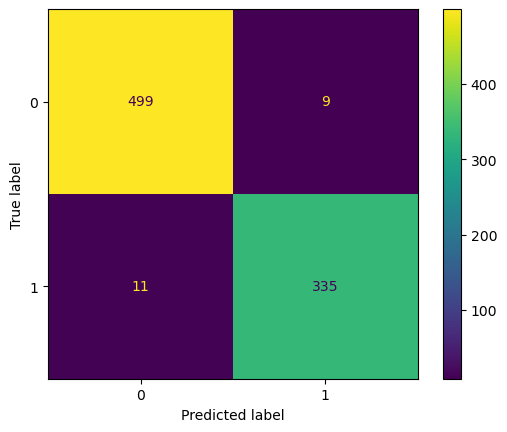

In [41]:
cm = confusion_matrix(y_val, y_pred_, labels = rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = rf_model.classes_)
disp.plot()

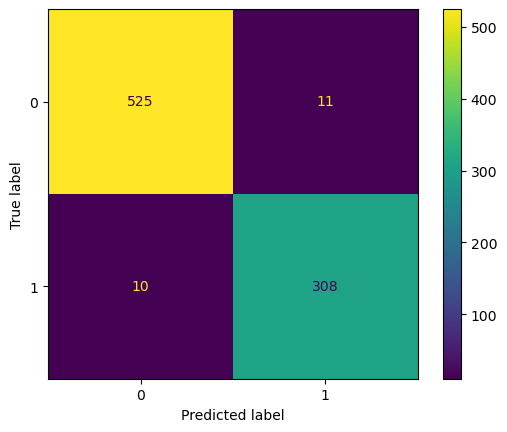

In [42]:
cm = confusion_matrix(y_test_, y_pred_test, labels = rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = rf_model.classes_)
disp.plot()

In [43]:
test_input = [[10, 1, 1, 100000, 100000000, 50, 200, 0, 0, 0, 0]]  # Extreme bad case
prediction = rf_model.predict(test_input)
print("Prediction:", prediction)

Prediction: [1]


/home/sagar_kc7/miniconda3/envs/code/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [44]:
import joblib  
joblib.dump(rf_model, 'loan_approval_prediction.pkl')  
print('Model saved successfully!')

Model saved successfully!
